### 통계적 유의성 vs 실질적 중요성
* p < 0.05 -> 통계적으로 유의함
* 하지만 실제로 의미 있는 차이인가?
* 표본이 크면 작은 차이도 유의하게 나올 수 있음

### 효과 크기
차이나는 관계의 "크기"를 나타내는 지표
1. **Cohen's d**: 두 그룹 평균 차이의 표준화된 크기
    - d = 0.2: 작은 효과
    - d = 0.5: 중간 효과
    - d = 0.8: 큰 효과
2. **상관계수 (r)**: 두 변수 간 선형 관계의 강도
    - r = 0.1: 약한 상관
    - r = 0.3: 중간 상관
    - r = 0.5: 강한 상관

**검정력 (Statistical Power)**
실제로 차이가 있을 때, 그것을 탐지할 확률

- 일반적으로 0.8 이상이 좋음
- 표본 크기가 클수록 검정력 증가

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
print("="*60)
print("1. 통계적 유의성 vs 실질적 중요성")
print("="*60)
print()

# 시나리오 1: 큰 표본, 작은 차이
np.random.seed(42)
group1_large = np.random.normal(100, 15, 1000)
group2_large = np.random.normal(101, 15, 1000)

t_stat1, p_value1 = stats.ttest_ind(group1_large, group2_large)

print("시나리오 1: 표본 크기가 큰 경우")
print(f"그룹1 평균: {group1_large.mean():.2f}")
print(f"그룹2 평균: {group2_large.mean():.2f}")
print(f"평균 차이: {group2_large.mean() - group1_large.mean():.2f}")
print(f"p-value: {p_value1:.4f}")
print(f"통계적 유의성: {'예' if p_value1 < 0.05 else '아니오'}")

1. 통계적 유의성 vs 실질적 중요성

시나리오 1: 표본 크기가 큰 경우
그룹1 평균: 100.29
그룹2 평균: 102.06
평균 차이: 1.77
p-value: 0.0076
통계적 유의성: 예


In [5]:
# 시나리오 2: 작은 표본, 큰 차이
group1_small = np.random.normal(100, 15, 20)
group2_small = np.random.normal(110, 15, 20)

t_stat2, p_value2 = stats.ttest_ind(group1_small, group2_small)

print("\n시나리오 2: 표본 크기가 작은 경우")
print(f"그룹1 평균: {group1_small.mean():.2f}")
print(f"그룹2 평균: {group2_small.mean():.2f}")
print(f"평균 차이: {group2_small.mean() - group1_small.mean():.2f}")
print(f"p-value: {p_value2:.4f}")
print(f"통계적 유의성: {'예' if p_value2 < 0.05 else '아니오'}")


시나리오 2: 표본 크기가 작은 경우
그룹1 평균: 97.24
그룹2 평균: 112.43
평균 차이: 15.19
p-value: 0.0002
통계적 유의성: 예


In [6]:
print("\n" + "="*60)
print("2. Cohen's d (효과 크기)")
print("="*60)
print()

def cohens_d(group1, group2):
    """Cohen's d 계산 함수"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group2) - np.mean(group1)) / pooled_std

# Cohen's d 계산
d1 = cohens_d(group1_large, group2_large)
d2 = cohens_d(group1_small, group2_small)

def interpret_cohens_d(d):
    """Cohen's d 해석"""
    d_abs = abs(d)
    if d_abs < 0.2:
        return "무시할 수 있는 효과"
    elif d_abs < 0.5:
        return "작은 효과"
    elif d_abs < 0.8:
        return "중간 효과"
    else:
        return "큰 효과"

print(f"시나리오 1 Cohen's d: {d1:.3f} ({interpret_cohens_d(d1)})")
print(f"시나리오 2 Cohen's d: {d2:.3f} ({interpret_cohens_d(d2)})")
print()
print("💡 해석:")
print("시나리오 1은 통계적으로 유의하지만 효과 크기가 매우 작음")
print("시나리오 2는 통계적으로 유의하지 않지만 효과 크기가 중간 정도")


2. Cohen's d (효과 크기)

시나리오 1 Cohen's d: 0.120 (무시할 수 있는 효과)
시나리오 2 Cohen's d: 1.314 (큰 효과)

💡 해석:
시나리오 1은 통계적으로 유의하지만 효과 크기가 매우 작음
시나리오 2는 통계적으로 유의하지 않지만 효과 크기가 중간 정도


In [7]:
print("\n" + "="*60)
print("3. 상관계수 (Correlation Coefficient)")
print("="*60)
print()

# 다양한 상관관계 생성
np.random.seed(42)
n = 100

# 약한 상관
x1 = np.random.normal(0, 1, n)
y1 = 0.2 * x1 + np.random.normal(0, 1, n)
r1, p1 = stats.pearsonr(x1, y1)

# 중간 상관
x2 = np.random.normal(0, 1, n)
y2 = 0.5 * x2 + np.random.normal(0, 0.8, n)
r2, p2 = stats.pearsonr(x2, y2)

# 강한 상관
x3 = np.random.normal(0, 1, n)
y3 = 0.8 * x3 + np.random.normal(0, 0.3, n)
r3, p3 = stats.pearsonr(x3, y3)

def interpret_correlation(r):
    """상관계수 해석"""
    r_abs = abs(r)
    if r_abs < 0.3:
        return "약한 상관"
    elif r_abs < 0.7:
        return "중간 상관"
    else:
        return "강한 상관"

print(f"약한 상관: r = {r1:.3f} (p={p1:.4f}) - {interpret_correlation(r1)}")
print(f"중간 상관: r = {r2:.3f} (p={p2:.4f}) - {interpret_correlation(r2)}")
print(f"강한 상관: r = {r3:.3f} (p={p3:.4f}) - {interpret_correlation(r3)}")


3. 상관계수 (Correlation Coefficient)

약한 상관: r = 0.054 (p=0.5904) - 약한 상관
중간 상관: r = 0.608 (p=0.0000) - 중간 상관
강한 상관: r = 0.949 (p=0.0000) - 강한 상관


In [9]:
print("\n" + "="*60)
print("4. 검정력 (Statistical Power)")
print("="*60)
print()

# 검정력 시뮬레이션
def simulate_power(effect_size, sample_size, n_simulations=1000):
    """검정력 시뮬레이션"""
    significant_count = 0
    
    for _ in range(n_simulations):
        group1 = np.random.normal(100, 15, sample_size)
        group2 = np.random.normal(100 + effect_size, 15, sample_size)
        _, p_value = stats.ttest_ind(group1, group2)
        
        if p_value < 0.05:
            significant_count += 1
    
    return significant_count / n_simulations

# 다양한 조건에서 검정력 계산
sample_sizes = [10, 30, 50, 100, 200]
effect_sizes = [3, 5, 10]  # 실제 차이

print("검정력 분석 결과:")
print("(표본 크기에 따른 검정력 변화)\n")

power_results = []
for effect in effect_sizes:
    print(f"효과 크기 = {effect}점 차이:")
    for n in sample_sizes:
        power = simulate_power(effect, n, n_simulations=500)
        power_results.append({'효과크기': effect, '표본크기': n, '검정력': power})
        print(f"  n={n:3d}: 검정력 = {power:.2f}")
    print()

power_df = pd.DataFrame(power_results)

print("💡 해석:")
print("- 검정력 0.8 이상이 바람직함")
print("- 표본 크기가 클수록 검정력 증가")
print("- 효과 크기가 클수록 검정력 증가")


4. 검정력 (Statistical Power)

검정력 분석 결과:
(표본 크기에 따른 검정력 변화)

효과 크기 = 3점 차이:
  n= 10: 검정력 = 0.05
  n= 30: 검정력 = 0.12
  n= 50: 검정력 = 0.18
  n=100: 검정력 = 0.30
  n=200: 검정력 = 0.50

효과 크기 = 5점 차이:
  n= 10: 검정력 = 0.14
  n= 30: 검정력 = 0.24
  n= 50: 검정력 = 0.34
  n=100: 검정력 = 0.65
  n=200: 검정력 = 0.91

효과 크기 = 10점 차이:
  n= 10: 검정력 = 0.30
  n= 30: 검정력 = 0.74
  n= 50: 검정력 = 0.90
  n=100: 검정력 = 0.99
  n=200: 검정력 = 1.00

💡 해석:
- 검정력 0.8 이상이 바람직함
- 표본 크기가 클수록 검정력 증가
- 효과 크기가 클수록 검정력 증가


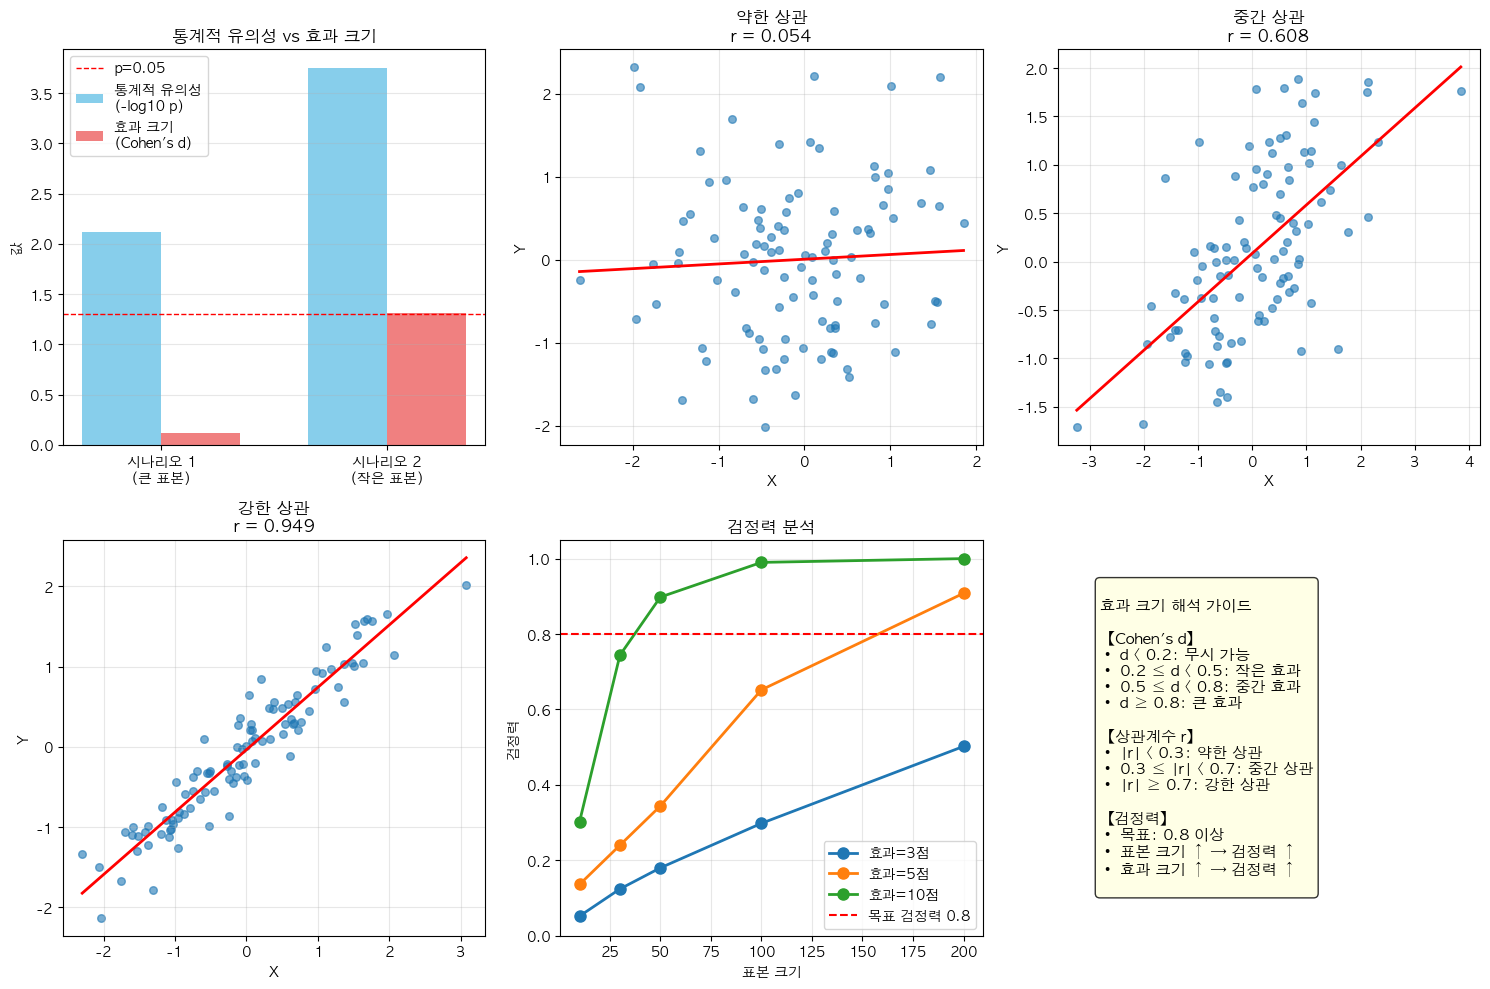


✏️ 실습 문제
1. 표본 크기 500, 효과 크기 2일 때 검정력은?
2. 검정력 0.8을 달성하려면 최소 표본 크기는?
3. p<0.05이지만 Cohen's d<0.2인 경우, 어떻게 해석해야 할까요?


In [10]:
# 시각화
fig = plt.figure(figsize=(15, 10))

# 1) 통계적 유의성 vs 효과 크기
ax1 = plt.subplot(2, 3, 1)
scenarios = ['시나리오 1\n(큰 표본)', '시나리오 2\n(작은 표본)']
p_values = [p_value1, p_value2]
cohens_ds = [d1, d2]

x = np.arange(len(scenarios))
width = 0.35
ax1.bar(x - width/2, [-np.log10(p) for p in p_values], width, label='통계적 유의성\n(-log10 p)', color='skyblue')
ax1.bar(x + width/2, cohens_ds, width, label='효과 크기\n(Cohen\'s d)', color='lightcoral')
ax1.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=1, label='p=0.05')
ax1.set_ylabel('값')
ax1.set_title('통계적 유의성 vs 효과 크기', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(scenarios)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2-4) 상관관계 산점도
correlations = [(x1, y1, r1, '약한 상관'), (x2, y2, r2, '중간 상관'), (x3, y3, r3, '강한 상관')]
for idx, (x, y, r, title) in enumerate(correlations, 2):
    ax = plt.subplot(2, 3, idx)
    ax.scatter(x, y, alpha=0.6, s=30)
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'{title}\nr = {r:.3f}', fontweight='bold')
    ax.grid(True, alpha=0.3)

# 5) 검정력 곡선
ax5 = plt.subplot(2, 3, 5)
for effect in effect_sizes:
    effect_data = power_df[power_df['효과크기'] == effect]
    ax5.plot(effect_data['표본크기'], effect_data['검정력'], 'o-', linewidth=2, 
             markersize=8, label=f'효과={effect}점')
ax5.axhline(y=0.8, color='red', linestyle='--', linewidth=1.5, label='목표 검정력 0.8')
ax5.set_xlabel('표본 크기')
ax5.set_ylabel('검정력')
ax5.set_title('검정력 분석', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.set_ylim([0, 1.05])

# 6) 효과 크기 해석 가이드
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
guide_text = """
효과 크기 해석 가이드

【Cohen's d】
• d < 0.2: 무시 가능
• 0.2 ≤ d < 0.5: 작은 효과
• 0.5 ≤ d < 0.8: 중간 효과
• d ≥ 0.8: 큰 효과

【상관계수 r】
• |r| < 0.3: 약한 상관
• 0.3 ≤ |r| < 0.7: 중간 상관
• |r| ≥ 0.7: 강한 상관

【검정력】
• 목표: 0.8 이상
• 표본 크기 ↑ → 검정력 ↑
• 효과 크기 ↑ → 검정력 ↑
"""
ax6.text(0.1, 0.5, guide_text, fontsize=11, verticalalignment='center',
         fontfamily='AppleGothic', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# 실습 문제
print("\n" + "="*60)
print("✏️ 실습 문제")
print("="*60)
print("1. 표본 크기 500, 효과 크기 2일 때 검정력은?")
print("2. 검정력 0.8을 달성하려면 최소 표본 크기는?")
print("3. p<0.05이지만 Cohen's d<0.2인 경우, 어떻게 해석해야 할까요?")